In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
derecho = pd.read_csv('derecho_RAW_AF7_RAW_AF8.csv')
izquierdo = pd.read_csv('izquierdo_RAW_AF7_RAW_AF8.csv')
test = pd.read_csv('data_test_Mariano_Rubiolo_RAW_AF7_RAW_AF8.csv')
test_2 = pd.read_csv('data_test_Matias_Tibaldo_RAW_AF7_RAW_AF8.csv')

#Separa X e Y del dataset
X_izquierdo = izquierdo.iloc[:, 1:3].values
X_derecho = derecho.iloc[:, 1:3].values
X_test = test.iloc[:,0:2].values
X_test_2 = test_2.iloc[:,0:2].values


In [3]:
# ASIGNACION DE Y=1 A PARTIR DE ANALISIS ESTADISTICO
Y_izq = np.zeros(len(X_izquierdo))
for i in range (1,len(X_izquierdo)):
    if np.mean(X_izquierdo)*1.05<np.mean(X_izquierdo[i]):
        Y_izq[i]=1
    if np.mean(X_izquierdo)*0.95>np.mean(X_izquierdo[i]):
        Y_izq[i]=1

        
Y_der = np.zeros(len(X_derecho))
for i in range (1,len(X_derecho)):
    if np.mean(X_derecho)*1.05<np.mean(X_derecho[i]):
        Y_der[i]=2
    if np.mean(X_derecho)*0.95>np.mean(X_derecho[i]):
        Y_der[i]=2

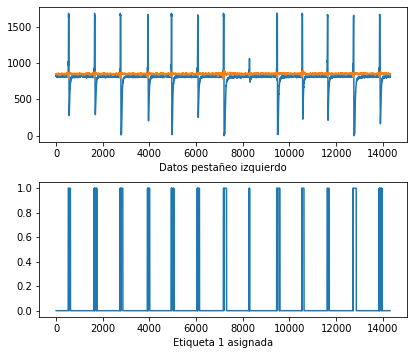

In [4]:
plt.figure()

plt.subplot(211)
plt.plot(X_izquierdo)
plt.xlabel('Datos pestañeo izquierdo')

plt.subplot(212)
plt.plot(Y_izq)
plt.xlabel('Etiqueta 1 asignada')

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()


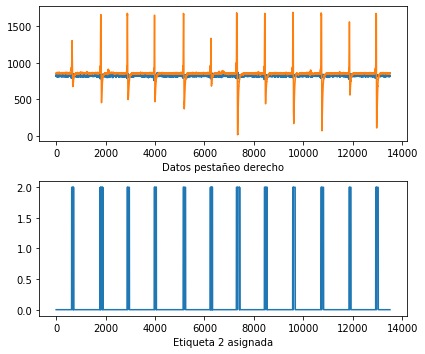

In [5]:
plt.figure()

plt.subplot(211)
plt.plot(X_derecho)
plt.xlabel('Datos pestañeo derecho')

plt.subplot(212)
plt.plot(Y_der)
plt.xlabel('Etiqueta 2 asignada')

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

In [6]:
X=np.concatenate((X_izquierdo,X_derecho))
Y=np.concatenate((Y_izq,Y_der))



In [7]:
from sklearn.svm import SVC 

svm_model = SVC(gamma='scale', decision_function_shape='ovo').fit(X, Y) 
print(svm_model.score(X, Y))


0.9981663910261019


In [8]:
svm_predictions = svm_model.predict(X_test)
svm_predictions_2 = svm_model.predict(X_test_2)


In [9]:
def round(n):
    dec = n - int(n)
    rst = int(n) if dec < 0.5 else int(n)+1
    return rst

inicio=0
fin=0
svm_predictions_processed=np.zeros(len(svm_predictions))

for i in range(len(svm_predictions)):
    if svm_predictions[i]!=0 and np.sum(svm_predictions[i-50:i-1])==0:
        inicio=i
    if svm_predictions[i]==0 and np.sum(svm_predictions[i:i+50])==0 and inicio!=0:
        fin=i
    if fin-inicio>50:
        svm_predictions_processed[inicio:fin] = round(np.mean(svm_predictions[inicio:fin]))
        inicio=0
        fin=0

inicio=0
fin=0
svm_predictions_processed_2=np.zeros(len(svm_predictions_2))
        
for i in range(len(svm_predictions_2)):
    if svm_predictions_2[i]!=0 and np.sum(svm_predictions_2[i-50:i-1])==0:
        inicio=i
    if svm_predictions_2[i]==0 and np.sum(svm_predictions_2[i:i+50])==0 and inicio!=0:
        fin=i
    if fin-inicio>50:
        svm_predictions_processed_2[inicio:fin] = round(np.mean(svm_predictions_2[inicio:fin]))
        inicio=0
        fin=0


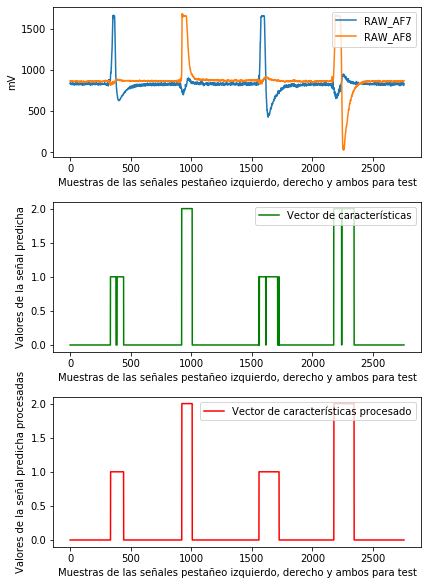

In [10]:
plt.figure()

plt.subplot(311)
[af7,af8] = plt.plot(X_test)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.ylabel("mV")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplot(312)
[pred]=plt.plot(svm_predictions, 'g')
plt.legend([pred], ["Vector de características"], loc=1)
plt.ylabel("Valores de la señal predicha")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplot(313)
[pred_proc]=plt.plot(svm_predictions_processed,'r')
plt.legend([pred_proc], ["Vector de características procesado"], loc=1)
plt.ylabel("Valores de la señal predicha procesadas")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplots_adjust(top=2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

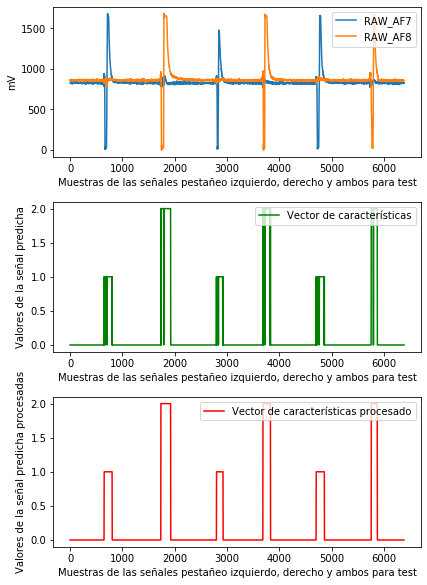

In [11]:
plt.figure()

plt.subplot(311)
[af7,af8] = plt.plot(X_test_2)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.ylabel("mV")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplot(312)
[pred]=plt.plot(svm_predictions_2, 'g')
plt.legend([pred], ["Vector de características"], loc=1)
plt.ylabel("Valores de la señal predicha")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplot(313)
[pred_proc]=plt.plot(svm_predictions_processed_2,'r')
plt.legend([pred_proc], ["Vector de características procesado"], loc=1)
plt.ylabel("Valores de la señal predicha procesadas")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplots_adjust(top=2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

In [12]:
import pickle
# save the model to disk
filename = 'SVM_model_izq_der.sav'
pickle.dump(svm_model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.9981663910261019
